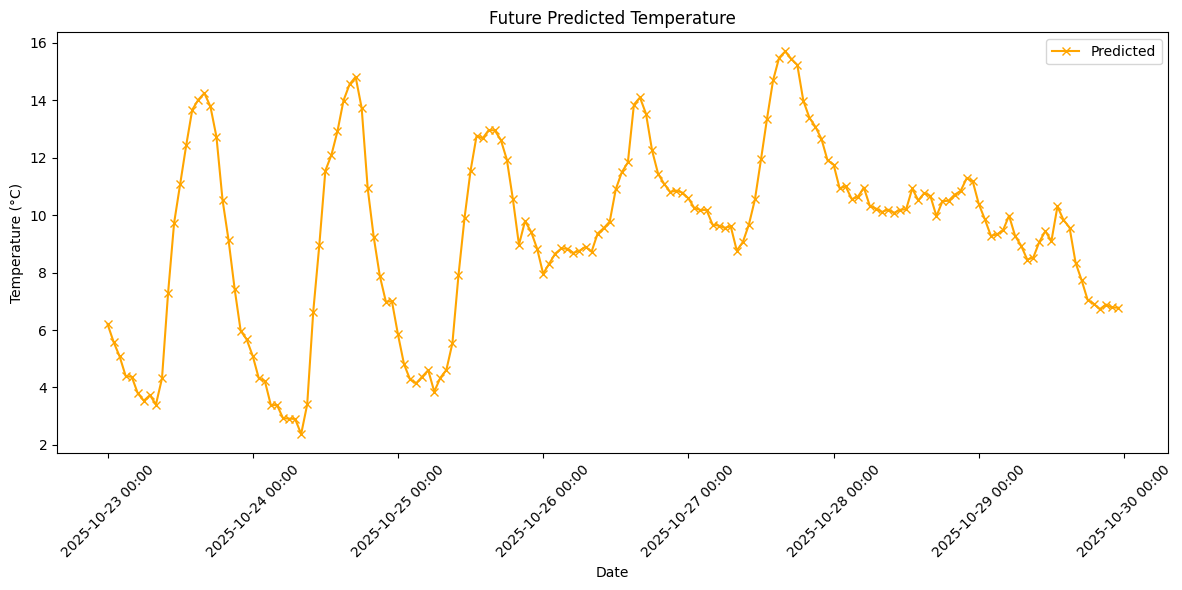

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import os

def plot_forecast(pred_csv: str):
    # Check file exists
    if not os.path.exists(pred_csv):
        print(f"File not found: {pred_csv}")
        return

    # Load predictions
    df = pd.read_csv(pred_csv)
    df["date"] = pd.to_datetime(df["date"])

    # If target column exists, plot actual vs predicted
    if "target" in df.columns:
        plt.figure(figsize=(12, 6))
        plt.plot(df["date"], df["target"], label="Actual", marker="o")
        plt.plot(df["date"], df["prediction"], label="Predicted", marker="x")
        plt.title("Actual vs Predicted Temperature")
    else:
        # Future dataset → only predictions
        plt.figure(figsize=(12, 6))
        plt.plot(df["date"], df["prediction"], label="Predicted", marker="x", color="orange")
        plt.title("Future Predicted Temperature")

    # Format x-axis for readable dates
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))

    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_forecast("predictions/forecast_future.csv")
